# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import urllib.parse
from sklearn.linear_model import LinearRegression
import seaborn as sns
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(city=city, weather_api_key=weather_api_key)
    print(city_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)

        city_weather = response.json()
    
        


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"Error: {e}")
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=cape town&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 1 of Set 1 | cape town
https://api.openweathermap.org/data/2.5/weather?q=tiksi&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 2 of Set 1 | tiksi
https://api.openweathermap.org/data/2.5/weather?q=coquimbo&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 3 of Set 1 | coquimbo
https://api.openweathermap.org/data/2.5/weather?q=yerbogachen&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 4 of Set 1 | yerbogachen
https://api.openweathermap.org/data/2.5/weather?q=barrow&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 5 of Set 1 | barrow
https://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 6 of Set 1 | mar del plata
https://api.openweathermap.org/data/2.5/weather?q=bassar&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processi

https://api.openweathermap.org/data/2.5/weather?q=chokurdakh&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 9 of Set 2 | chokurdakh
https://api.openweathermap.org/data/2.5/weather?q=buraydah&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 10 of Set 2 | buraydah
https://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 11 of Set 2 | carnarvon
https://api.openweathermap.org/data/2.5/weather?q=cabo san lucas&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 12 of Set 2 | cabo san lucas
https://api.openweathermap.org/data/2.5/weather?q=attawapiskat&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 13 of Set 2 | attawapiskat
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 14 of Set 2 | arraial do cabo
https://api.openweathermap.org/data/2.5/weather?q=busselton&appid=ecb0694e5714a07a7b

https://api.openweathermap.org/data/2.5/weather?q=ojinaga&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 17 of Set 3 | ojinaga
https://api.openweathermap.org/data/2.5/weather?q=bose&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 18 of Set 3 | bose
https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 19 of Set 3 | jamestown
https://api.openweathermap.org/data/2.5/weather?q=naze&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 20 of Set 3 | naze
https://api.openweathermap.org/data/2.5/weather?q=ocho rios&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 21 of Set 3 | ocho rios
https://api.openweathermap.org/data/2.5/weather?q=muros&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 22 of Set 3 | muros
https://api.openweathermap.org/data/2.5/weather?q=kysyl-syr&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 23 of Set 3 | kysyl-syr
https://api.openweathermap.org/data/2.5/weath

https://api.openweathermap.org/data/2.5/weather?q=westport&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 24 of Set 4 | westport
https://api.openweathermap.org/data/2.5/weather?q=sao joaquim&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 25 of Set 4 | sao joaquim
https://api.openweathermap.org/data/2.5/weather?q=longyearbyen&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 26 of Set 4 | longyearbyen
https://api.openweathermap.org/data/2.5/weather?q=coahuayana&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 27 of Set 4 | coahuayana
https://api.openweathermap.org/data/2.5/weather?q=skalnyy&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 28 of Set 4 | skalnyy
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=ullapool&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 29 of Set 4 | ullapool
https://api.openweathermap.org/data/2.5/weather?q=ati&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Rec

https://api.openweathermap.org/data/2.5/weather?q=turkmenabat&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 32 of Set 5 | turkmenabat
https://api.openweathermap.org/data/2.5/weather?q=torzhok&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 33 of Set 5 | torzhok
https://api.openweathermap.org/data/2.5/weather?q=muravlenko&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 34 of Set 5 | muravlenko
https://api.openweathermap.org/data/2.5/weather?q=hunza&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 35 of Set 5 | hunza
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=hailun&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 36 of Set 5 | hailun
https://api.openweathermap.org/data/2.5/weather?q=codrington&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 37 of Set 5 | codrington
https://api.openweathermap.org/data/2.5/weather?q=paragould&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 38 o

https://api.openweathermap.org/data/2.5/weather?q=yarkovo&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 40 of Set 6 | yarkovo
https://api.openweathermap.org/data/2.5/weather?q=bulgan&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 41 of Set 6 | bulgan
https://api.openweathermap.org/data/2.5/weather?q=amga&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 42 of Set 6 | amga
https://api.openweathermap.org/data/2.5/weather?q=culpeper&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 43 of Set 6 | culpeper
https://api.openweathermap.org/data/2.5/weather?q=nandgaon&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 44 of Set 6 | nandgaon
https://api.openweathermap.org/data/2.5/weather?q=tambacounda&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 45 of Set 6 | tambacounda
https://api.openweathermap.org/data/2.5/weather?q=nguiu&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 46 of Set 6 | nguiu
Error: 'coord'
City not found. Skipping..

https://api.openweathermap.org/data/2.5/weather?q=nizhneyansk&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 47 of Set 7 | nizhneyansk
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=kempele&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 48 of Set 7 | kempele
https://api.openweathermap.org/data/2.5/weather?q=fort nelson&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 49 of Set 7 | fort nelson
https://api.openweathermap.org/data/2.5/weather?q=mogochin&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 0 of Set 8 | mogochin
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=olafsvik&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 1 of Set 8 | olafsvik
https://api.openweathermap.org/data/2.5/weather?q=kirkwood&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 2 of Set 8 | kirkwood
https://api.openweathermap.org/data/2.5/weather?q=lovozero&appid=ecb0694e

https://api.openweathermap.org/data/2.5/weather?q=dongsheng&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 4 of Set 9 | dongsheng
https://api.openweathermap.org/data/2.5/weather?q=yithion&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 5 of Set 9 | yithion
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=turkistan&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 6 of Set 9 | turkistan
https://api.openweathermap.org/data/2.5/weather?q=sao raimundo nonato&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 7 of Set 9 | sao raimundo nonato
https://api.openweathermap.org/data/2.5/weather?q=totness&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 8 of Set 9 | totness
https://api.openweathermap.org/data/2.5/weather?q=la paz&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 9 of Set 9 | la paz
https://api.openweathermap.org/data/2.5/weather?q=rosario oeste&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processi

https://api.openweathermap.org/data/2.5/weather?q=hokitika&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 13 of Set 10 | hokitika
https://api.openweathermap.org/data/2.5/weather?q=port hardy&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 14 of Set 10 | port hardy
https://api.openweathermap.org/data/2.5/weather?q=melle&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 15 of Set 10 | melle
https://api.openweathermap.org/data/2.5/weather?q=pacific grove&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 16 of Set 10 | pacific grove
https://api.openweathermap.org/data/2.5/weather?q=lolua&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 17 of Set 10 | lolua
Error: 'coord'
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=bahia honda&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 18 of Set 10 | bahia honda
https://api.openweathermap.org/data/2.5/weather?q=alyangula&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing

https://api.openweathermap.org/data/2.5/weather?q=porto novo&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 20 of Set 11 | porto novo
https://api.openweathermap.org/data/2.5/weather?q=port-gentil&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 21 of Set 11 | port-gentil
https://api.openweathermap.org/data/2.5/weather?q=challans&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 22 of Set 11 | challans
https://api.openweathermap.org/data/2.5/weather?q=anshun&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 23 of Set 11 | anshun
https://api.openweathermap.org/data/2.5/weather?q=tabory&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 24 of Set 11 | tabory
https://api.openweathermap.org/data/2.5/weather?q=saldanha&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 25 of Set 11 | saldanha
https://api.openweathermap.org/data/2.5/weather?q=dawei&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 26 of Set 11 | dawei
https://api.openweatherm

https://api.openweathermap.org/data/2.5/weather?q=nhulunbuy&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 26 of Set 12 | nhulunbuy
https://api.openweathermap.org/data/2.5/weather?q=waingapu&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 27 of Set 12 | waingapu
https://api.openweathermap.org/data/2.5/weather?q=port blair&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 28 of Set 12 | port blair
https://api.openweathermap.org/data/2.5/weather?q=uvat&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 29 of Set 12 | uvat
https://api.openweathermap.org/data/2.5/weather?q=salsk&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 30 of Set 12 | salsk
https://api.openweathermap.org/data/2.5/weather?q=portales&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 31 of Set 12 | portales
https://api.openweathermap.org/data/2.5/weather?q=kangaatsiaq&appid=ecb0694e5714a07a7b00b51b0a1053e8
Processing Record 32 of Set 12 | kangaatsiaq
https://api.openweathe

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,294.21,81,20,7.20,ZA,1675203842
1,tiksi,71.6872,128.8694,252.77,100,100,4.88,RU,1675204207
2,coquimbo,-29.9533,-71.3436,293.00,77,20,5.14,CL,1675203936
3,yerbogachen,61.2767,108.0108,237.58,100,76,1.26,RU,1675203697
4,barrow,71.2906,-156.7887,251.16,84,0,11.83,US,1675204208


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,294.21,81,20,7.20,ZA,1675203842
1,tiksi,71.6872,128.8694,252.77,100,100,4.88,RU,1675204207
2,coquimbo,-29.9533,-71.3436,293.00,77,20,5.14,CL,1675203936
3,yerbogachen,61.2767,108.0108,237.58,100,76,1.26,RU,1675203697
4,barrow,71.2906,-156.7887,251.16,84,0,11.83,US,1675204208


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

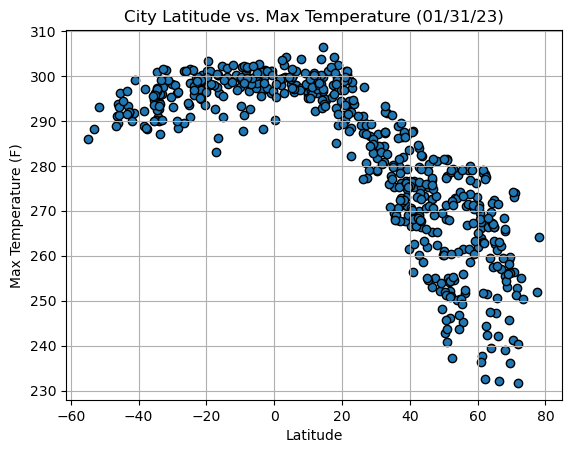

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

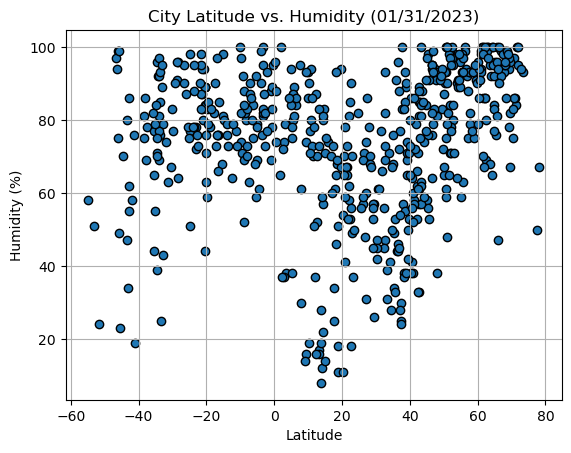

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (01/31/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

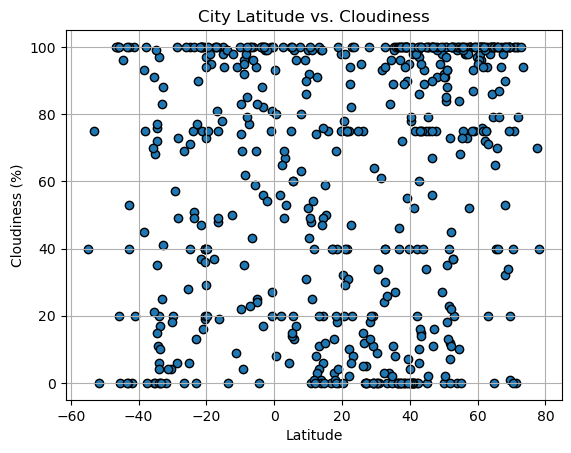

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

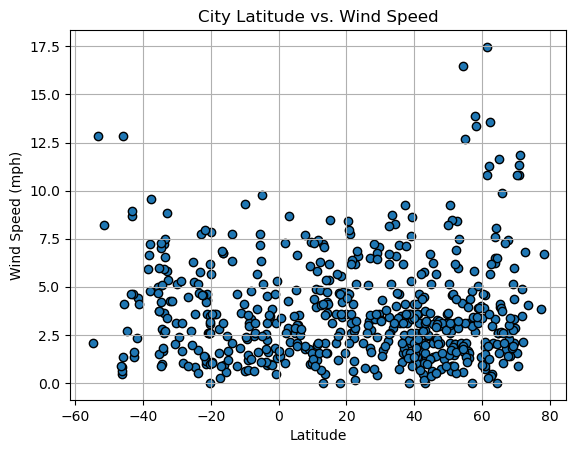

In [15]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, title, xlabel, ylabel):
    # Fit the linear regression model
    model = LinearRegression().fit(x, y)

    # Get the regression line
    line = model.predict(x)

    # Plot the regression line
    plt.plot(x, line, color='red', linewidth=1)
    # Plot the scatter plot
    plt.scatter(x, y)
    
    # Add title, x label, and y label
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tiksi,71.6872,128.8694,252.77,100,100,4.88,RU,1675204207
3,yerbogachen,61.2767,108.0108,237.58,100,76,1.26,RU,1675203697
4,barrow,71.2906,-156.7887,251.16,84,0,11.83,US,1675204208
6,bassar,9.2500,0.7833,297.93,16,86,0.98,TG,1675204208
9,lethem,3.3803,-59.7968,304.23,38,53,2.15,GY,1675203727


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cape town,-33.9258,18.4232,294.21,81,20,7.20,ZA,1675203842
2,coquimbo,-29.9533,-71.3436,293.00,77,20,5.14,CL,1675203936
5,mar del plata,-38.0023,-57.5575,297.09,86,75,7.20,AR,1675204100
7,kupang,-10.1667,123.5833,297.47,100,100,4.12,ID,1675204209
8,hermanus,-34.4187,19.2345,290.82,92,11,2.79,ZA,1675204209


###  Temperature vs. Latitude Linear Regression Plot

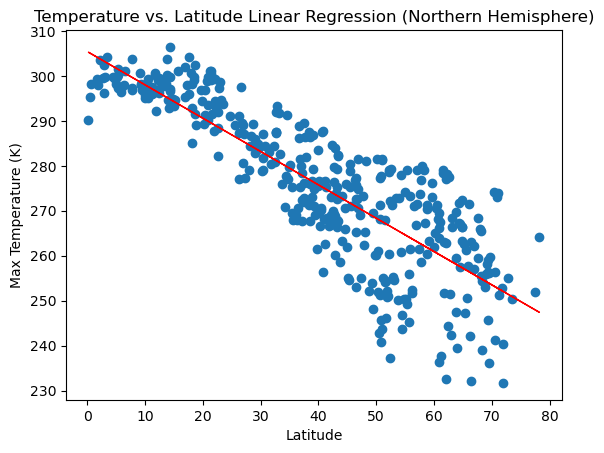

In [26]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat'].values.reshape(-1, 1)
y = northern_hemi_df['Max Temp'].values.reshape(-1, 1)
linear_regression(x, y, 'Temperature vs. Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Max Temperature (K)')

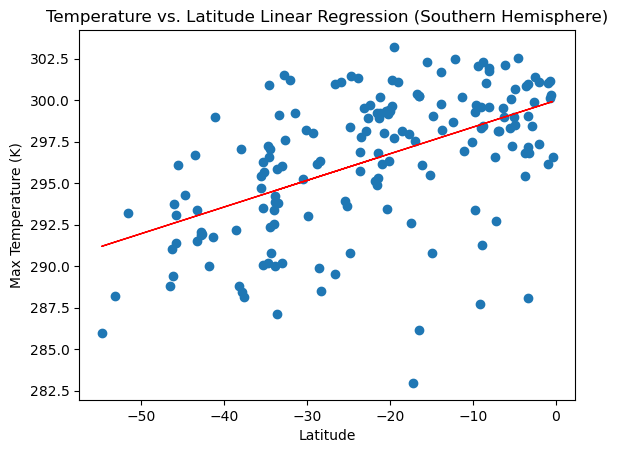

In [27]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat'].values.reshape(-1, 1)
y = southern_hemi_df['Max Temp'].values.reshape(-1, 1)
linear_regression(x, y, 'Temperature vs. Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Max Temperature (K)')

**Discussion about the linear relationship:** as latitude increases temperature decrease and vice versa for the southern hemisphere as latitude decreases temperature increases.

### Humidity vs. Latitude Linear Regression Plot

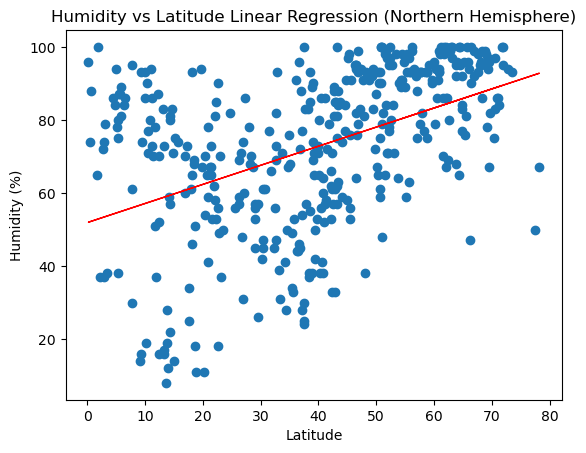

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat'].values.reshape(-1,1)
y_values = northern_hemi_df['Humidity'].values.reshape(-1,1)

linear_regression(x_values, y_values, 'Humidity vs Latitude Linear Regression (Northern Hemisphere)', 'Latitude', 'Humidity (%)')

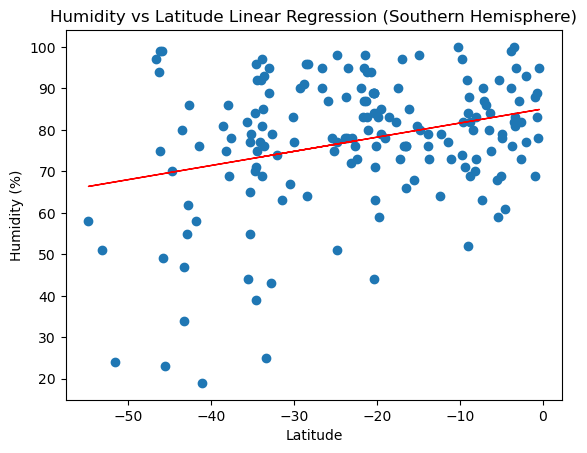

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat'].values.reshape(-1,1)
y_values = southern_hemi_df['Humidity'].values.reshape(-1,1)

linear_regression(x_values, y_values, 'Humidity vs Latitude Linear Regression (Southern Hemisphere)', 'Latitude', 'Humidity (%)')

**Discussion about the linear relationship:** Humidity seems to increase the further the latitude moves from 0.

### Cloudiness vs. Latitude Linear Regression Plot

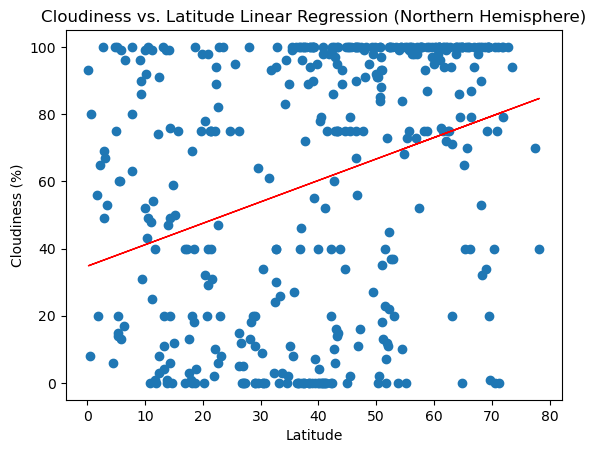

In [30]:
# Northern Hemisphere
x = northern_hemi_df[['Lat']]
y = northern_hemi_df[['Cloudiness']]
linear_regression(x, y, "Cloudiness vs. Latitude Linear Regression (Northern Hemisphere)", "Latitude", "Cloudiness (%)")

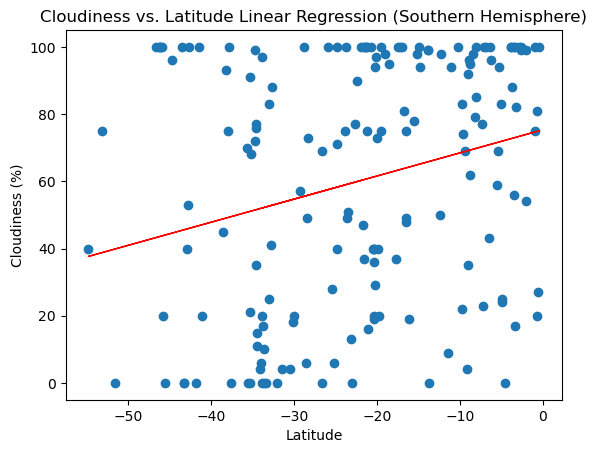

In [31]:
# Southern Hemisphere
x = southern_hemi_df[['Lat']]
y = southern_hemi_df[['Cloudiness']]
linear_regression(x, y, "Cloudiness vs. Latitude Linear Regression (Southern Hemisphere)", "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:** No correlation between clouidness and lattitude.

### Wind Speed vs. Latitude Linear Regression Plot

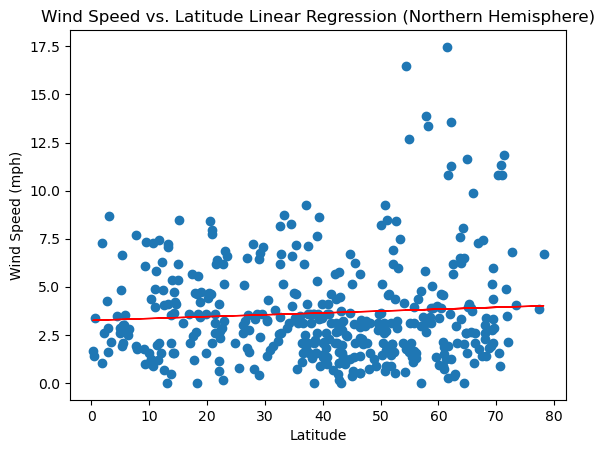

In [32]:
# Northern Hemisphere
x = northern_hemi_df[['Lat']]
y = northern_hemi_df[['Wind Speed']]
linear_regression(x, y, "Wind Speed vs. Latitude Linear Regression (Northern Hemisphere)", "Latitude", "Wind Speed (mph)")


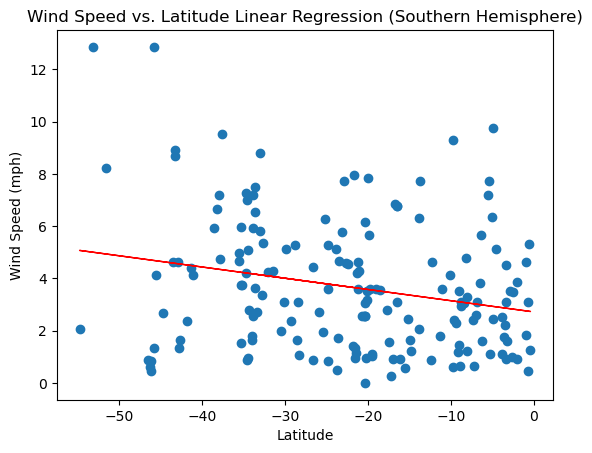

In [33]:
# Southern Hemisphere
x = southern_hemi_df[['Lat']]
y = southern_hemi_df[['Wind Speed']]
linear_regression(x, y, "Wind Speed vs. Latitude Linear Regression (Southern Hemisphere)", "Latitude", "Wind Speed (mph)")

**Discussion about the linear relationship:** wind speed seems to only sightly increase in the Northen Hemisphere while its slightly decreasing with lattitude in the Southern Hemisphere